In [83]:
import numpy as np
from matplotlib import pyplot as plt
import os
from img_prcs import *
from graphinference import *
import networkx as nx
import matplotlib as mpl

In [2]:
#read from path, img size[?>128,?>128]       
def img_read(test_path,file_list):
    DHM_img = io.imread(os.path.join(test_path,file_list))
    return DHM_img

In [3]:
test_path="/Users/behnaz/NCADD/prediction_cell_neurite/img"
file_list = [f for f in os.listdir(test_path) if f[-3:]=="tif"]
file_list

['Neurite_Mask_2022_08_09_D12_CS2_7_5X.tif',
 'Cell_Mask_2022_08_09_D12_CS2_7_5X.tif',
 'Cell_wsh_2022_08_09_D12_CS2_7_5X.tif',
 '2022_08_09_D12_CS2_7_5X.tif']

In [67]:
cell = img_read(test_path,file_list[2])
img = img_read(test_path,file_list[3])
neurite = img_read(test_path,file_list[0])

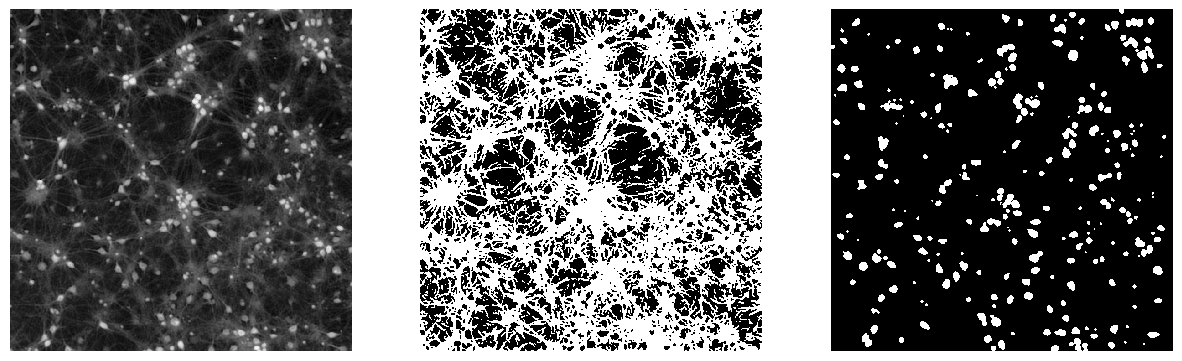

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))         
axs[0].matshow(img, cmap = 'Greys_r')
axs[0].axis('off')
#axs[0].set_title('Cell bodies')
axs[1].matshow(neurite, cmap = 'Greys_r')
axs[1].axis('off')
#axs[1].set_title('Neurites')
axs[2].matshow((cell)>0, cmap = 'Greys_r')
axs[2].axis('off')
#axs[2].set_title('Neuronal network')
plt.show()

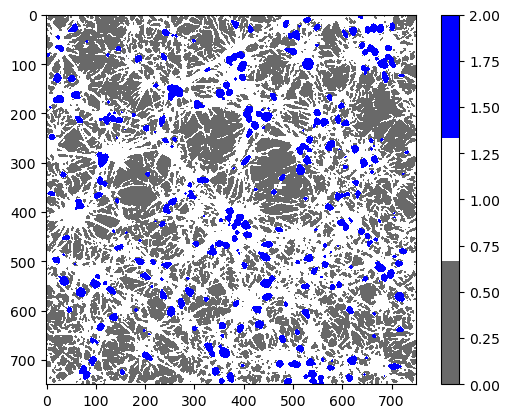

In [6]:
total = 2*(cell>0)+neurite
total[total>1]=2
np.unique(total)

cmap = mpl.colors.ListedColormap(['dimgray','white', 'blue'])
plt.imshow(total,cmap=cmap)
#plt.savefig('3colormask.svg')
plt.colorbar()

In [8]:
vertices, weights, paths, paths_matrix = infer_structural_graph(cell, neurite, find_paths = True)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


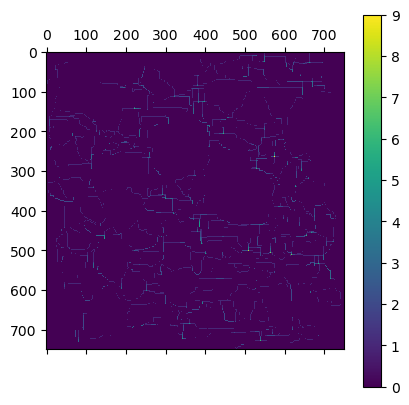

In [27]:
print(paths_matrix)
plt.matshow(paths_matrix)
plt.colorbar()

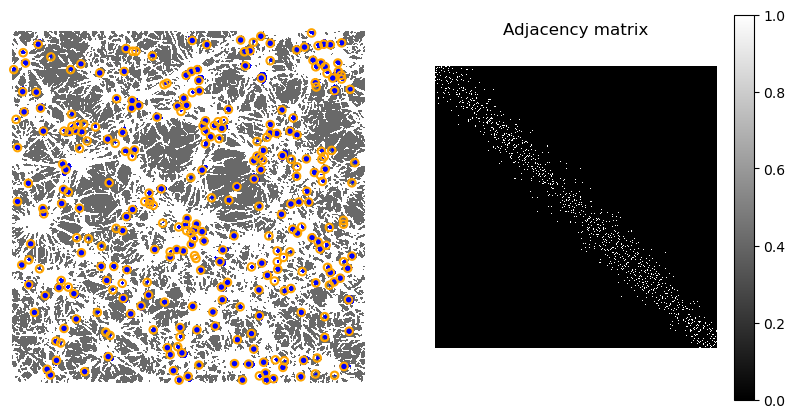

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 
#axs[0].set_title('Graph vertices')
axs[0].matshow(total, cmap=cmap)
axs[0].axis('off')
for vertex in vertices.keys():
    i,j = vertices[vertex]
    circle = plt.Circle((j,i), 8, linewidth=1.5, color='orange', clip_on=False, fill=False) # coordinated must be reverse
    axs[0].add_patch(circle)
plt.savefig('Graphvertices.png', dpi = 300)
axs[1].matshow(weights>0, cmap = 'gray')
axs[1].axis('Off')
# Create a ScalarMappable object
sm = plt.cm.ScalarMappable(cmap='gray')
# Add a colorbar to the plot
fig.colorbar(sm, ax=axs[1])
axs[1].set_title('Adjacency matrix')
plt.show()

In [36]:
total

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

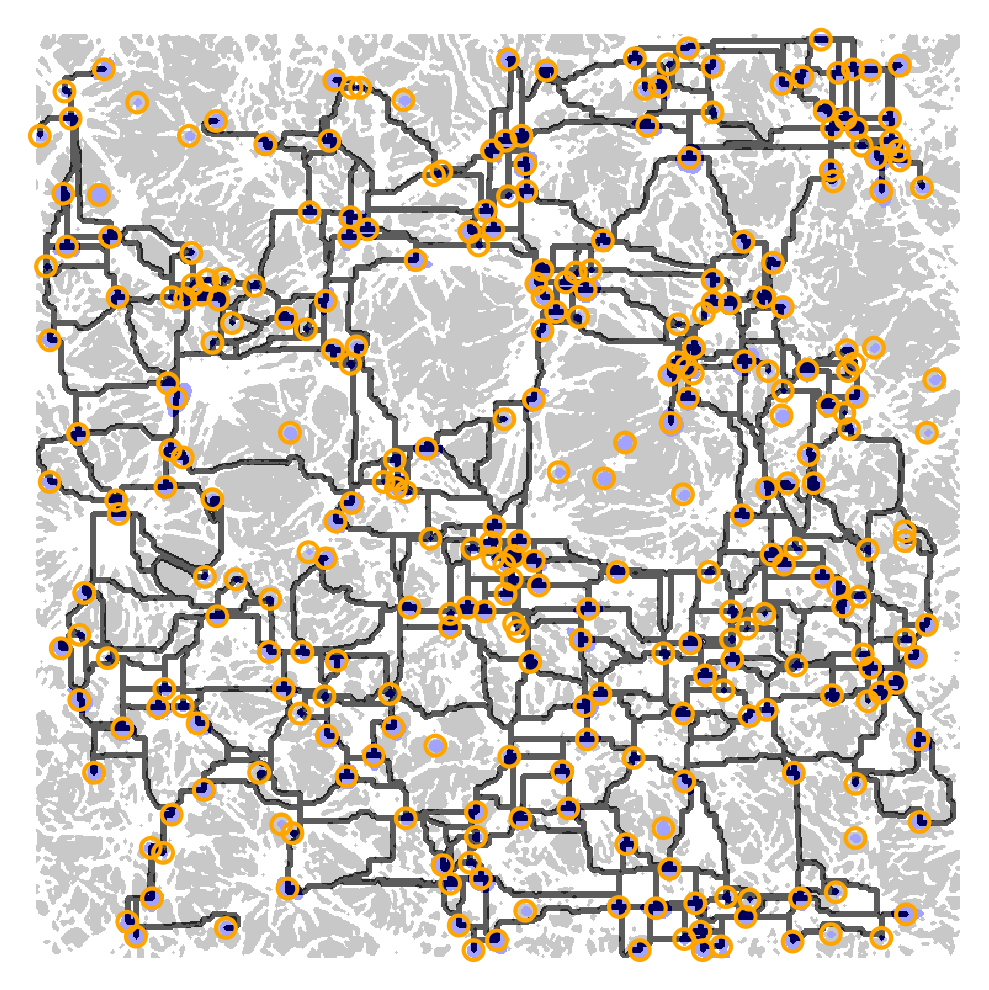

In [50]:
# First graph representation where the edges follow the neurites

fig, ax = plt.subplots(figsize=(4,4), dpi=300) 
# cell bodies and neurites as background image
ax.matshow(total, cmap=cmap)#matshow((cell+neurite)>0, cmap = 'gray_r')
ax.axis('off')
# # inferred paths between cell bodies
footprint = disk(2)
dilated_paths_matrix = dilation(paths_matrix>0, footprint)
for vertex in vertices.keys():
    i,j = vertices[vertex]
    circle = plt.Circle((j,i), 8, color='orange',alpha=1, clip_on=False, fill=False) # coordinated must be reverse
    ax.add_patch(circle)
ax.matshow(dilated_paths_matrix>0, cmap = 'bone_r', alpha=0.64)
# highlighting cell bodies as graph vertices

#plt.savefig('inferred_paths.png', dpi = 300)
plt.show()




# # Second graph representation where the edges don't follow the neurites
# # cell bodies and neurites
# plt.matshow(total, cmap=cmap)
# # graph drawed with networkx 
g = nx.Graph(weights>0)
pos = [(vertices[vertex][1],vertices[vertex][0]) for vertex in vertices.keys()]
# nx.draw(g,pos, node_size=10, node_color='orange', edge_color='darkblue',linewidths=1, width=2.0,with_labels=False)
# #plt.savefig('inferred_graph.png', dpi = 300)
# plt.show()

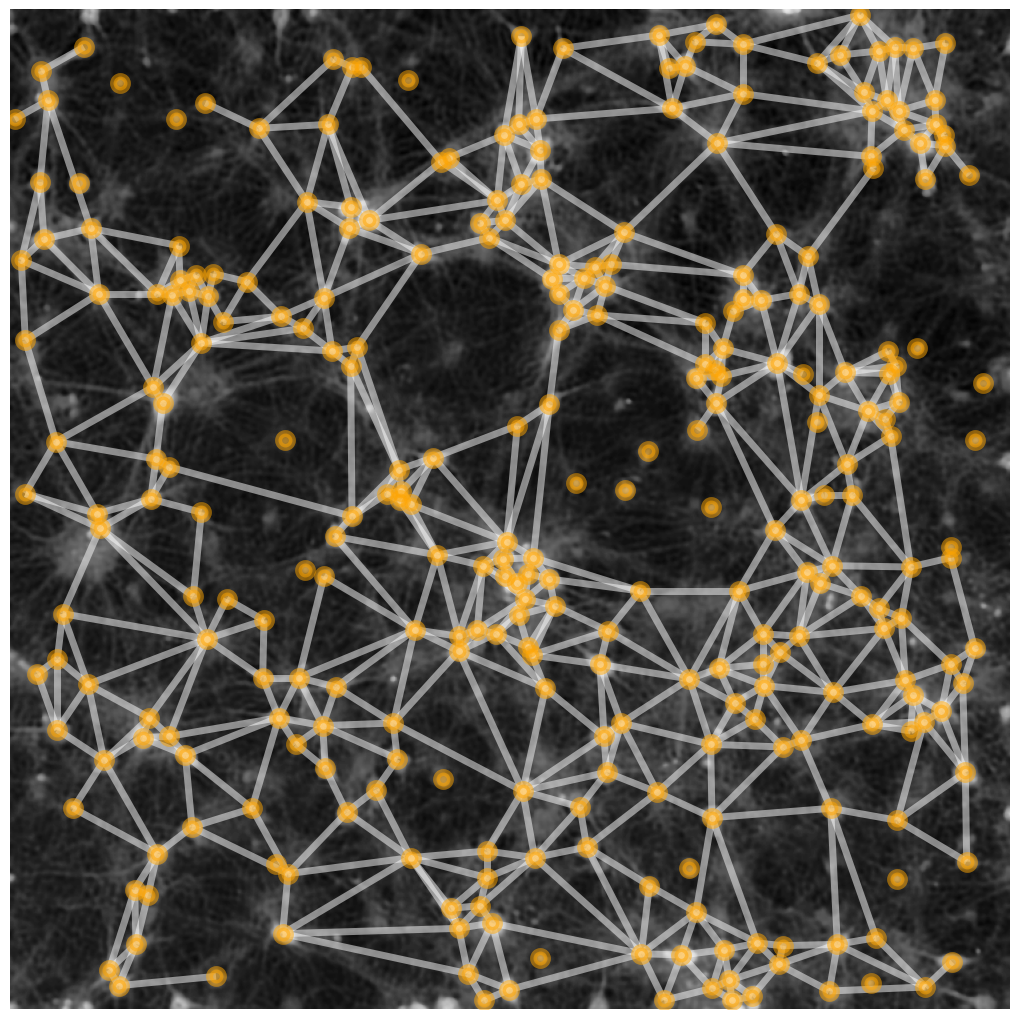

In [51]:
#plt.figure(3,figsize=(12,12)) 
fig = plt.figure(figsize=(10,10))
# plt.imshow(img, cmap='RdBu_r')
nx.draw(g, pos, node_size=100, node_color='orange', edge_color='white',linewidths=5, width=5,alpha=0.5)
plt.imshow(img, cmap='Greys_r')
#plt.savefig('graph+img.png', dpi = 300)

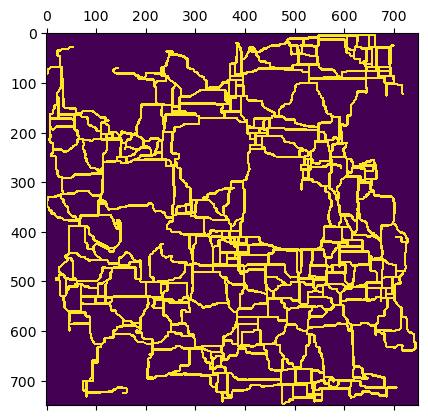

In [52]:
footprint = disk(2)
dilated_paths_matrix = dilation(paths_matrix>0, footprint)
plt.matshow(dilated_paths_matrix)